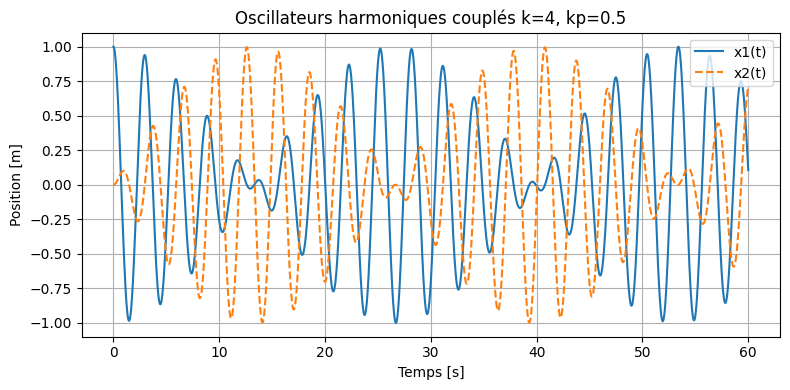

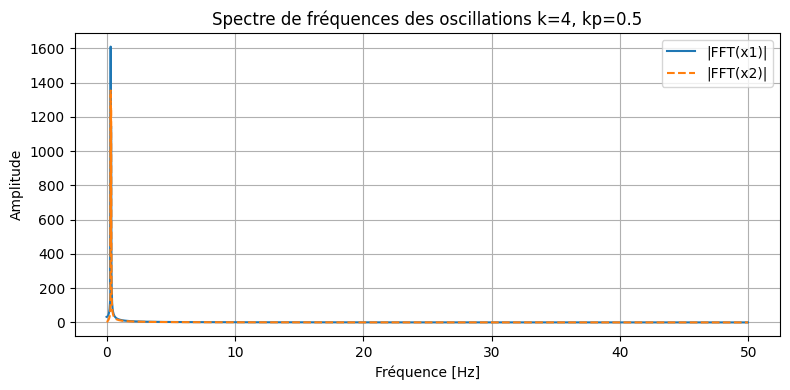

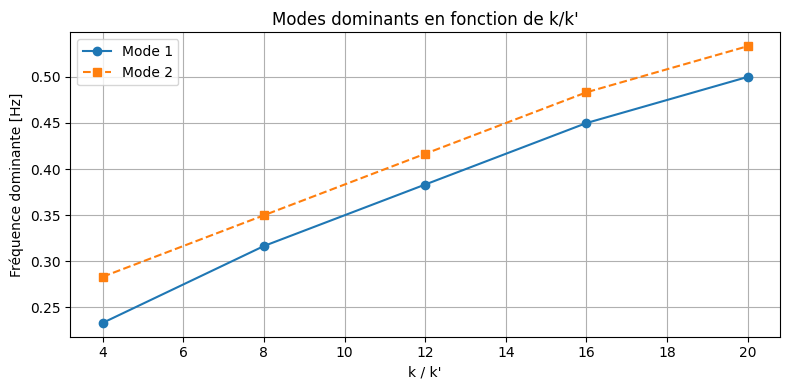

Simulation terminée.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
# Q3 : Fonction equations_motion
def equations_motion(t, y, m, k, kp):
    # y = [x1, v1, x2, v2]
    x1, v1, x2, v2 = y
    dx1dt = v1
    dv1dt = (-k * x1 + kp * (x2 - x1)) / m
    dx2dt = v2
    dv2dt = (-k * x2 + kp * (x1 - x2)) / m
    return [dx1dt, dv1dt, dx2dt, dv2dt]
# Paramètres généraux
m = 1.0               # masse [kg]
t_span = (0, 60)      # intervalle de temps
t_eval = np.linspace(*t_span, 6000)
y0 = [1.0, 0.0, 0.0, 0.0]  # conditions initiales

# Q4 : Simulation du système
k = 4.0
kp = 0.5
sol = solve_ivp(equations_motion, t_span, y0, t_eval=t_eval,
                args=(m, k, kp), method='RK45', rtol=1e-8, atol=1e-8)
if not sol.success:
    raise RuntimeError("Erreur de convergence ")

plt.figure(figsize=(8,4))
plt.plot(sol.t, sol.y[0], label="x1(t)", color="tab:blue")
plt.plot(sol.t, sol.y[2], label="x2(t)", color="tab:orange", linestyle="--")
plt.xlabel("Temps [s]")
plt.ylabel("Position [m]")
plt.title("Oscillateurs harmoniques couplés k=4, kp=0.5")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Q5 : FFT
dt = t_eval[1] - t_eval[0]
freq = np.fft.fftfreq(len(t_eval), d=dt)
fft_x1 = np.fft.fft(sol.y[0])
fft_x2 = np.fft.fft(sol.y[2])
half = len(freq)//2

plt.figure(figsize=(8,4))
plt.plot(freq[:half], np.abs(fft_x1[:half]), label="|FFT(x1)|", color="tab:blue")
plt.plot(freq[:half], np.abs(fft_x2[:half]), label="|FFT(x2)|", color="tab:orange", linestyle="--")
plt.xlabel("Fréquence [Hz]")
plt.ylabel("Amplitude")
plt.title("Spectre de fréquences des oscillations k=4, kp=0.5")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Q6
k_values = [2, 4, 6, 8, 10]  # différentes constantes k
kp = 0.5                     # constante de couplage fixée
ratios = []
mode1 = []
mode2 = []

for k in k_values:
    sol = solve_ivp(equations_motion, t_span, y0, t_eval=t_eval,
                    args=(m, k, kp), method='RK45', rtol=1e-8, atol=1e-8)

    # FFT
    fft_x1 = np.fft.fft(sol.y[0])
    fft_x2 = np.fft.fft(sol.y[2])
    fft_mag = (np.abs(fft_x1[:half]) + np.abs(fft_x2[:half])) / 2

    # Deux fréquences dominantes
    idx = np.argsort(fft_mag)[-2:]
    dominant_freqs = np.sort(freq[:half][idx])

    ratios.append(k/kp)
    mode1.append(dominant_freqs[0])
    mode2.append(dominant_freqs[1])

# Graphique des modes dominants
plt.figure(figsize=(8,4))
plt.plot(ratios, mode1, 'o-', label="Mode 1")
plt.plot(ratios, mode2, 's--', label="Mode 2")
plt.xlabel("k / k'")
plt.ylabel("Fréquence dominante [Hz]")
plt.title("Modes dominants en fonction de k/k'")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Simulation terminée.")
